# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df = pd.read_csv("data/kc_house_data.csv")

# Exploratory Data Analysis

In [100]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [102]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price', ylabel='Count'>

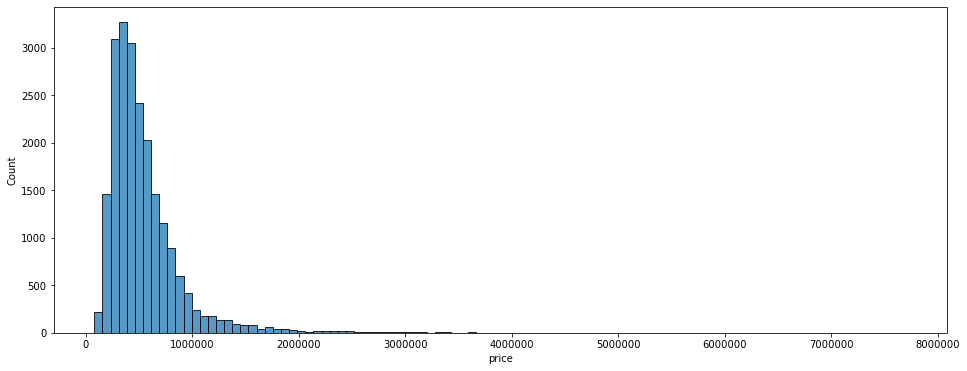

In [103]:
plt.figure(figsize=(16,6))
plt.ticklabel_format(style='plain', axis="x")
sns.histplot(data=df, x="price",bins=100)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

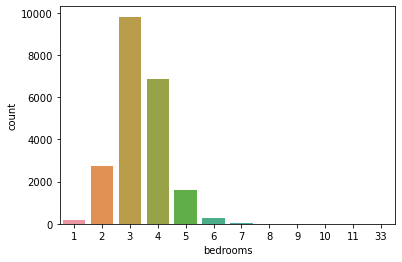

In [104]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(df["bedrooms"])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

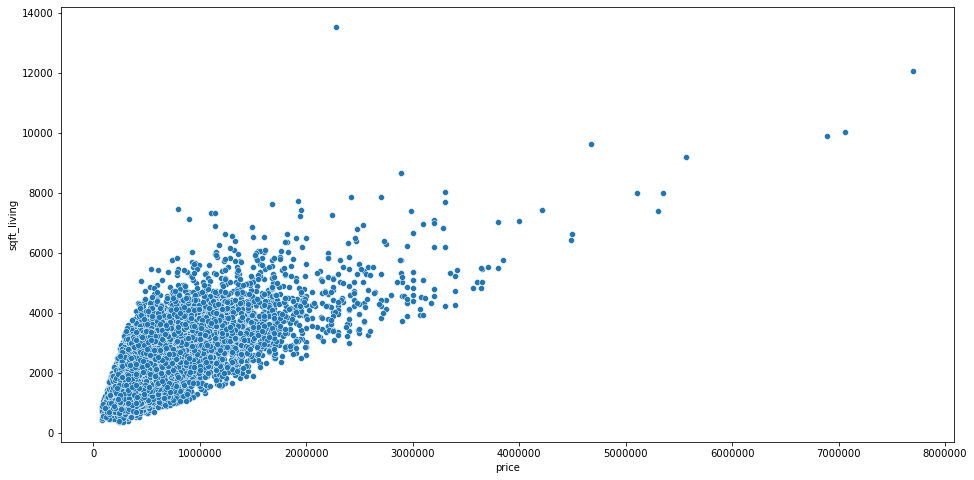

In [105]:
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain', axis="x")
sns.scatterplot(x="price",y="sqft_living",data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

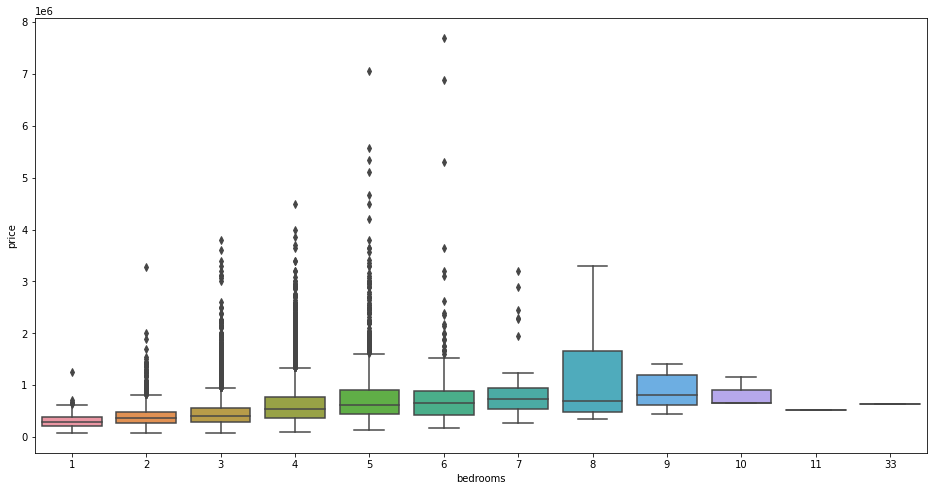

In [107]:
plt.figure(figsize=(16,8))
sns.boxplot(x="bedrooms", y="price",data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

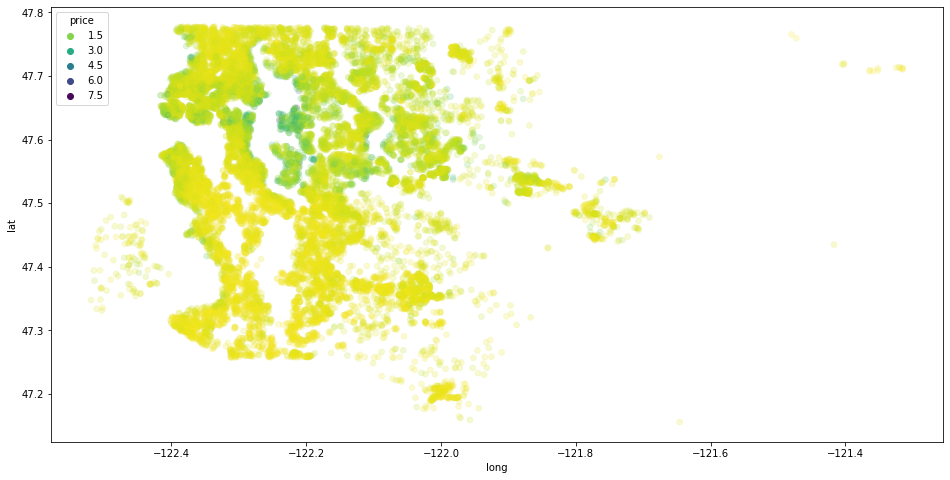

In [108]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="long",y="lat",data=df, 
                hue="price", palette="viridis_r", edgecolor=None, alpha=0.2)


In [112]:
df = df[df["price"] < 3000000.0]
df = df[df["sqft_living"]<12000]

<AxesSubplot:xlabel='long', ylabel='lat'>

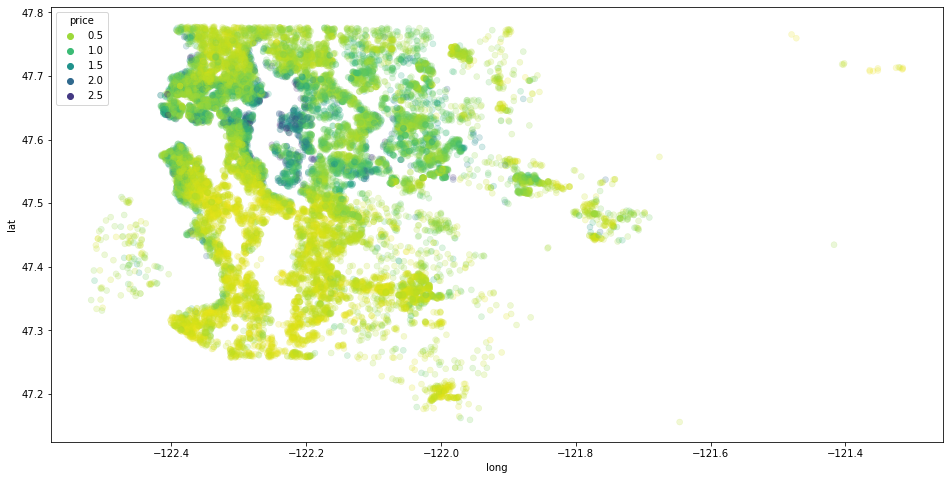

In [113]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="long",y="lat",data=df, 
                hue="price", palette="viridis_r", edgecolor=None, alpha=0.2)


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

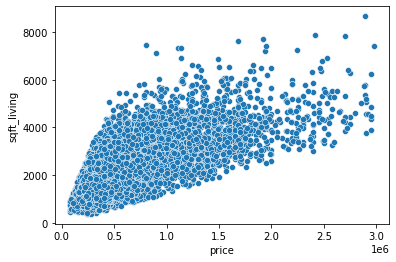

In [116]:
sns.scatterplot(x="price",y="sqft_living",data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

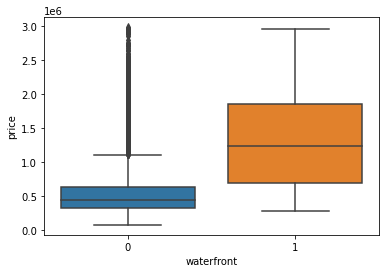

In [117]:
sns.boxplot(x="waterfront",y="price",data=df)

In [118]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].apply(lambda date: date.month)
df["year"] =  df["date"].apply(lambda date: date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

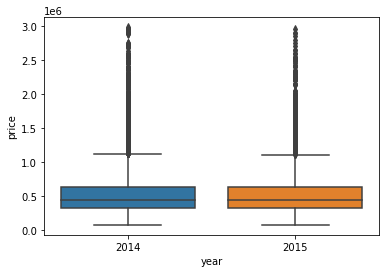

In [119]:
sns.boxplot(data=df, y="price",x="year")

<AxesSubplot:xlabel='month', ylabel='price'>

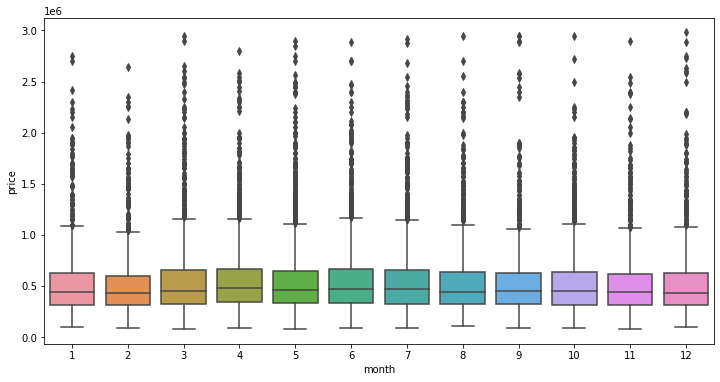

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y="price",x="month")

<AxesSubplot:xlabel='year'>

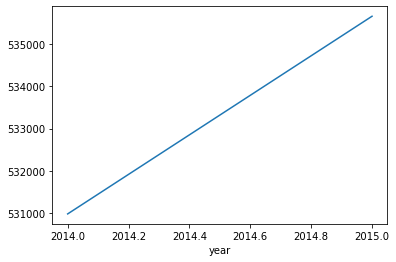

In [121]:
df.groupby("year").mean()["price"].plot()


<AxesSubplot:xlabel='month'>

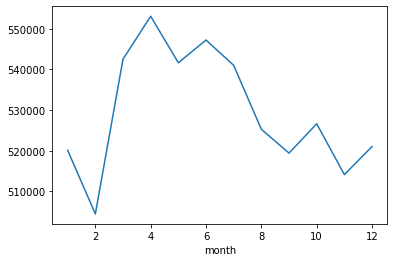

In [122]:
df.groupby("month").mean()["price"].plot()

In [123]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [124]:
df.drop(["date","id","zipcode"],inplace=True,axis=1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [125]:
df['yr_renovated'].value_counts()

0       20639
2014       91
2013       37
2003       36
2005       35
        ...  
1959        1
1934        1
1954        1
1951        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [126]:
df['sqft_basement'].value_counts()

0       13100
600       220
700       218
500       214
800       206
        ...  
295         1
1990        1
1798        1
518         1
1135        1
Name: sqft_basement, Length: 295, dtype: int64

## Scaling and Train Test Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X=df.drop("price",axis=1)
y=df["price"]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=421)


In [130]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler=MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [132]:
print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")

Train Data: (15081, 19)
Test Data: (6464, 19)


## Training the Model


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [134]:
model = Sequential()

model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [135]:
model.fit(x=X_train,y=y_train.values,
         validation_data=(X_test,y_test.values),
         batch_size=128,epochs=200)

Epoch 1/200
118/118 [==============================] - 1s 3ms/step - loss: 386109112320.0000 - val_loss: 401229185024.0000
Epoch 2/200
118/118 [==============================] - 0s 1ms/step - loss: 384860684288.0000 - val_loss: 396642942976.0000
Epoch 3/200
118/118 [==============================] - 0s 1ms/step - loss: 367809560576.0000 - val_loss: 355282419712.0000
Epoch 4/200
118/118 [==============================] - 0s 1ms/step - loss: 286757912576.0000 - val_loss: 219428028416.0000
Epoch 5/200
118/118 [==============================] - 0s 1ms/step - loss: 141350092800.0000 - val_loss: 87807795200.0000
Epoch 6/200
118/118 [==============================] - 0s 1ms/step - loss: 77261733888.0000 - val_loss: 74315563008.0000
Epoch 7/200
118/118 [==============================] - 0s 1ms/step - loss: 73269657600.0000 - val_loss: 72954175488.0000
Epoch 8/200
118/118 [==============================] - 0s 1ms/step - loss: 71930740736.0000 - val_loss: 71682924544.0000
Epoch 9/200
118/118 [==

Epoch 68/200
118/118 [==============================] - 0s 963us/step - loss: 29871636480.0000 - val_loss: 33006026752.0000
Epoch 69/200
118/118 [==============================] - 0s 955us/step - loss: 29733562368.0000 - val_loss: 32897187840.0000
Epoch 70/200
118/118 [==============================] - 0s 957us/step - loss: 29581137920.0000 - val_loss: 32902662144.0000
Epoch 71/200
118/118 [==============================] - 0s 1ms/step - loss: 29475708928.0000 - val_loss: 32737282048.0000
Epoch 72/200
118/118 [==============================] - 0s 954us/step - loss: 29339291648.0000 - val_loss: 32688873472.0000
Epoch 73/200
118/118 [==============================] - 0s 985us/step - loss: 29245089792.0000 - val_loss: 32617779200.0000
Epoch 74/200
118/118 [==============================] - 0s 1ms/step - loss: 29133821952.0000 - val_loss: 32601917440.0000
Epoch 75/200
118/118 [==============================] - 0s 969us/step - loss: 29058144256.0000 - val_loss: 32683655168.0000
Epoch 76/200

118/118 [==============================] - 0s 1ms/step - loss: 25728735232.0000 - val_loss: 34909536256.0000


In [136]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

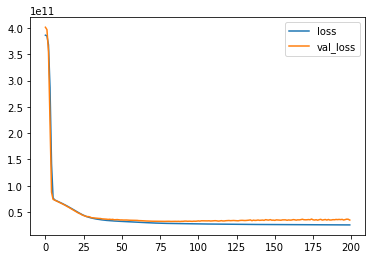

In [137]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [138]:
predictions=model.predict(X_test)

In [139]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R_sq:",explained_variance_score(y_test,predictions))


MAE: 124792.86055944461
MSE: 34909526790.64626
RMSE: 186840.9130534484
R_sq: 0.7271238278799781


In [140]:
df['price'].mean()

532489.4452541192

In [141]:
df['price'].median()

450000.0

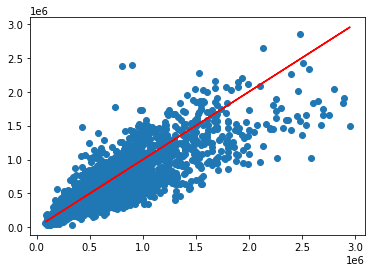

In [142]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,"r")

<AxesSubplot:ylabel='Count'>

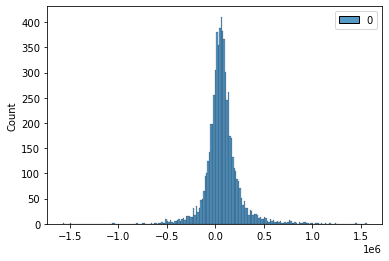

In [143]:
sns.histplot(y_test.values.reshape(6464, 1) - predictions)

### Predicting on a brand new house

In [145]:
new_house = df.drop('price',axis=1).iloc[0]
new_house=scaler.transform(new_house.values.reshape(-1,19))

print("Predicted Price: ",model.predict(new_house)[0][0])
print("Actual Price: ",df.iloc[0]["price"])

print("Diff: ", df.iloc[0]["price"] - model.predict(new_house))

Predicted Price:  228397.06
Actual Price:  221900.0
Diff:  [[-6497.0625]]


# Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)

Text(0, 0.5, 'Predicted Y')

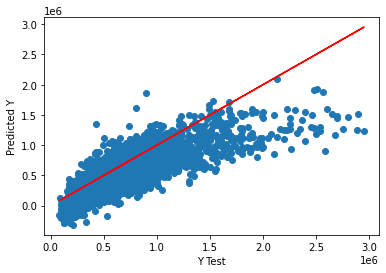

In [147]:
predictions_lm = lm_model.predict( X_test)
plt.scatter(y_test,predictions_lm)
plt.plot(y_test,y_test,"r")
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

## Evaluating the Model


In [148]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,predictions_lm))
print("MSE:",metrics.mean_squared_error(y_test,predictions_lm))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions_lm)))
print("R_sq:",metrics.explained_variance_score(y_test,predictions_lm))


MAE: 168764.26286402426
MSE: 51705677393.82186
RMSE: 227388.82425005382
R_sq: 0.6884691268888995


<AxesSubplot:xlabel='price', ylabel='Count'>

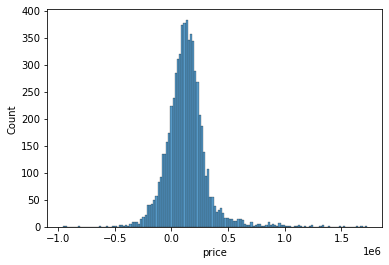

In [149]:
# Residuals
sns.histplot((y_test-predictions_lm))

In [150]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
bedrooms,-690321.959139
bathrooms,281665.161997
sqft_living,534199.157602
sqft_lot,288079.202038
floors,29339.329356
waterfront,375803.075141
view,191655.748174
condition,136103.056300
grade,983616.114622
sqft_above,543393.677125


### Predicting on a brand new house

In [170]:
new_house = df.drop('price',axis=1).iloc[0]
new_house=scaler.transform(new_house.values.reshape(-1,19))

print("Predicted Price: ",lm_model.predict(new_house)[0])
print("Actual Price: ",df.iloc[0]["price"])

print("Diff: ", df.iloc[0]["price"] - lm_model.predict(new_house))



Predicted Price:  112514.74500697188
Actual Price:  221900.0
Diff:  [109385.25499303]
